In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 한글이나 기호가 깨지지 않게 해주는 옵션
import platform # 현재 사용하고 있는 시스템 환경에 대한 정보를 알려줌
from matplotlib import font_manager, rc
font = 'Malgun Gothic'
plt.rcParams['font.family'] = font  # rcParams를 통한 폰트변경
import collections
import os
import seaborn as sns

In [2]:
home = os.getcwd() + '\\'

In [3]:
# save_dir='test'

In [3]:
import warnings
warnings.filterwarnings(action='ignore')  # 경고메세지를 무시하고 숨김

In [5]:
# os.chdir('./flow_data')

In [4]:
data = pd.read_excel('mydata.xlsx')

In [5]:
data

,Date,count,age65up,Delta_count,Omicron_count,Delta_prop,Omicron_prop,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,...,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential,death,period
0,2020-02-15,0,0,0,0,0.0,0.0,-4,0,3,...,1,3,-8,0,2,-4,1,3,0,1
1,2020-02-16,2,2,0,0,0.0,0.0,-11,0,-31,...,-3,4,-15,0,-33,-16,-3,4,1,1
2,2020-02-17,0,0,0,0,0.0,0.0,-7,-6,-17,...,0,5,-9,-6,-17,-7,0,5,0,1
3,2020-02-18,2,0,0,0,0.0,0.0,-1,-3,-5,...,2,2,1,-2,-3,-1,2,2,0,1
4,2020-02-19,34,5,0,0,0.0,0.0,-5,-1,14,...,1,2,-7,-1,9,-5,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,2022-04-07,224761,30541,0,0,0.0,0.0,-6,8,23,...,7,1,-15,2,19,-17,3,3,29,5
783,2022-04-08,205302,29193,0,0,0.0,0.0,-5,14,28,...,6,1,-13,6,28,-13,1,3,0,5
784,2022-04-09,185526,29472,0,0,0.0,0.0,0,18,42,...,-3,2,-10,8,42,-12,-7,2,0,5
785,2022-04-10,164454,26131,0,0,0.0,0.0,9,14,61,...,-5,1,0,3,74,-8,-8,0,0,5


In [6]:
data.columns

Index(['Date', 'count', 'age65up', 'Delta_count', 'Omicron_count',
       'Delta_prop', 'Omicron_prop', 'seoul_retail_recreation',
       'seoul_grocery_pharmacy', 'seoul_parks', 'seoul_transit_stations',
       'seoul_workplaces', 'seoul_residential', 'metro_retail_recreation',
       'metro_grocery_pharmacy', 'metro_parks', 'metro_transit_stations',
       'metro_workplaces', 'metro_residential', 'death', 'period'],
      dtype='object')

In [7]:
cols=['count', 'age65up', 'Delta_count', 'Omicron_count',
       'Delta_prop', 'Omicron_prop', 'seoul_retail_recreation',
       'seoul_grocery_pharmacy', 'seoul_parks', 'seoul_transit_stations',
       'seoul_workplaces', 'seoul_residential', 'metro_retail_recreation',
       'metro_grocery_pharmacy', 'metro_parks', 'metro_transit_stations',
       'metro_workplaces', 'metro_residential', 'death']  # date를 제외한 컬럼으로 리스트 생성

In [8]:
data[cols] # date를 제외한 컬럼으로 구성된 데이터 보기

,count,age65up,Delta_count,Omicron_count,Delta_prop,Omicron_prop,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,seoul_transit_stations,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential,death
0,0,0,0,0,0.0,0.0,-4,0,3,-6,1,3,-8,0,2,-4,1,3,0
1,2,2,0,0,0.0,0.0,-11,0,-31,-15,-3,4,-15,0,-33,-16,-3,4,1
2,0,0,0,0,0.0,0.0,-7,-6,-17,-6,0,5,-9,-6,-17,-7,0,5,0
3,2,0,0,0,0.0,0.0,-1,-3,-5,-3,2,2,1,-2,-3,-1,2,2,0
4,34,5,0,0,0.0,0.0,-5,-1,14,-4,1,2,-7,-1,9,-5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,224761,30541,0,0,0.0,0.0,-6,8,23,-16,7,1,-15,2,19,-17,3,3,29
783,205302,29193,0,0,0.0,0.0,-5,14,28,-12,6,1,-13,6,28,-13,1,3,0
784,185526,29472,0,0,0.0,0.0,0,18,42,-12,-3,2,-10,8,42,-12,-7,2,0
785,164454,26131,0,0,0.0,0.0,9,14,61,-7,-5,1,0,3,74,-8,-8,0,0


In [9]:
datacorr_cases=data[cols] #datacorr_cases라는 객체에 위에서 구한 date를 제외한 컬럼으로 구성된 데이터 저장

In [10]:
len(cols)

19

In [11]:
plt.figure(figsize=(15,15))
k = 19 #number of variables for heatmap
corrmat = datacorr_cases.corr()  # 각 수치형 변수간의 상관계수
corrmat

,count,age65up,Delta_count,Omicron_count,Delta_prop,Omicron_prop,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,seoul_transit_stations,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential,death
count,1.000000,0.989182,-0.099669,-0.032287,-0.136937,-0.030648,-0.070547,-0.071357,-0.165281,-0.309690,0.057620,0.092016,-0.111660,-0.136293,-0.220484,-0.268216,0.040616,0.075335,0.387537
age65up,0.989182,1.000000,-0.084023,-0.028461,-0.124729,-0.027698,-0.071869,-0.075972,-0.158685,-0.299635,0.066613,0.073473,-0.114167,-0.142113,-0.212798,-0.260049,0.049412,0.055770,0.351320
Delta_count,-0.099669,-0.084023,1.000000,0.397056,0.809769,0.326846,0.401921,0.305370,0.078656,0.216497,0.128610,-0.103949,0.352166,0.252148,0.039793,0.199745,0.094870,-0.086523,0.518713
Omicron_count,-0.032287,-0.028461,0.397056,1.000000,0.209999,0.975551,0.083296,0.075550,-0.080140,-0.023758,-0.017757,0.064271,0.082185,0.065084,-0.110350,-0.014947,-0.024387,0.061961,0.234297
Delta_prop,-0.136937,-0.124729,0.809769,0.209999,1.000000,0.185686,0.535088,0.464414,0.243528,0.323489,0.113079,-0.150961,0.444656,0.377515,0.175622,0.257871,0.068009,-0.116604,0.290790
Omicron_prop,-0.030648,-0.027698,0.326846,0.975551,0.185686,1.000000,0.078939,0.070880,-0.070663,-0.019747,-0.017141,0.058414,0.078738,0.061547,-0.099720,-0.012310,-0.022224,0.057631,0.194353
seoul_retail_recreation,-0.070547,-0.071869,0.401921,0.083296,0.535088,0.078939,1.000000,0.760058,0.576752,0.763125,0.328724,-0.557715,0.959628,0.724997,0.513713,0.705059,0.292666,-0.515031,0.147385
seoul_grocery_pharmacy,-0.071357,-0.075972,0.305370,0.075550,0.464414,0.070880,0.760058,1.000000,0.520086,0.536856,0.025919,-0.260965,0.647932,0.962575,0.431734,0.412251,-0.023906,-0.211891,0.103175
seoul_parks,-0.165281,-0.158685,0.078656,-0.080140,0.243528,-0.070663,0.576752,0.520086,1.000000,0.560333,-0.191747,-0.291659,0.528180,0.495836,0.899033,0.357404,-0.205367,-0.222456,-0.150718
seoul_transit_stations,-0.309690,-0.299635,0.216497,-0.023758,0.323489,-0.019747,0.763125,0.536856,0.560333,1.000000,0.513003,-0.830038,0.785015,0.559133,0.581360,0.942666,0.491447,-0.769238,-0.117155


<Figure size 1080x1080 with 0 Axes>

(19.0, 0.0)

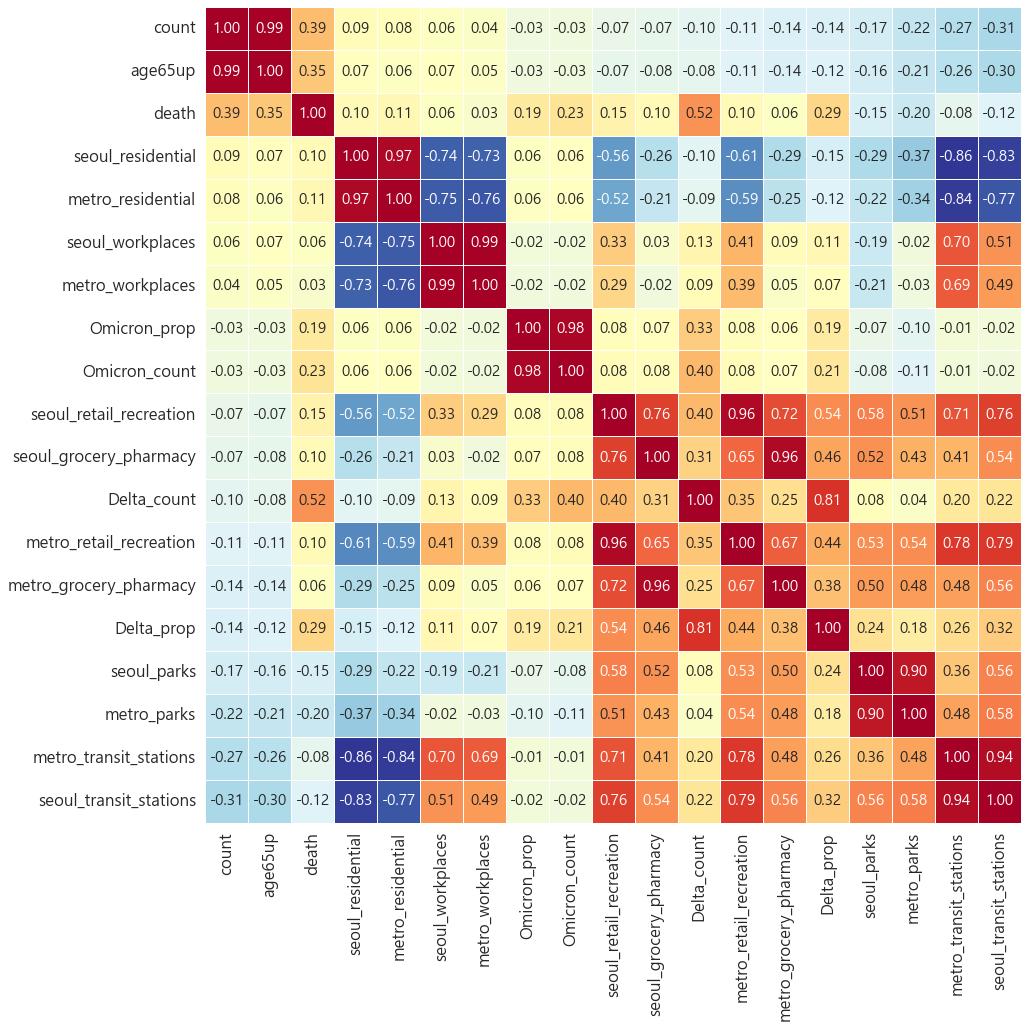

In [16]:
plt.figure(figsize=(15,15))
k = 19 #number of variables for heatmap
corrmat = datacorr_cases.corr()
cols = corrmat.nlargest(k, 'count')['count'].index # count열을 기준으로 값이 높은 순대로 k개를 뽑은 후 'count'열들의 index저장
cm = np.corrcoef(datacorr_cases[cols].values.T) # 모든 데이터가 표시되도록 values.T를 지정
sns.set(font_scale=1.5, font="Malgun Gothic") # sns plot설정
# ax = sns.heatmap(cm, cmap = 'RdYlBu_r', annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
ax = sns.heatmap(cm, cmap = 'RdYlBu_r',cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
# cbar: 히트맵의 색, annot: 각 cell의 값 표기유무, fmt: 데이터 값 표기 방법, square: 모두 다 사각형으로 표시할 것인지,
# annot_kws: key,value mapping 여기서는 size를 15로 지정, 